In [5]:
import requests
from PIL import Image as PILImage
import io
import time
import os
from IPython.display import display, clear_output
from datetime import datetime

def continuous_analysis(jetbot_ip, save_dir="captured_images"):
    """
    Continuously fetches and displays images from Jetbot camera.
    Saves each image every 0.1 seconds with a timestamp including milliseconds.
    """
    os.makedirs(save_dir, exist_ok=True)

    try:
        while True:
            try:
                # Fetch image from Jetbot
                response = requests.get(f'http://{jetbot_ip}:8080/camera', timeout=2)
                image = PILImage.open(io.BytesIO(response.content))

                # Optional: show image in Jupyter
                clear_output(wait=True)
                display(image)

                # Build filename with timestamp including milliseconds
                now = datetime.now()
                timestamp = now.strftime("%Y%m%d-%H%M%S") + "-" + str(int(now.microsecond / 1000)).zfill(3)
                filename = os.path.join(save_dir, f"jetbot_{timestamp}.jpg")

                # Save image
                image.save(filename)

            except Exception as e:
                print(f"Error fetching/saving image: {e}")

            # Wait 0.1 seconds
            time.sleep(1)

    except KeyboardInterrupt:
        print("Stream stopped.")


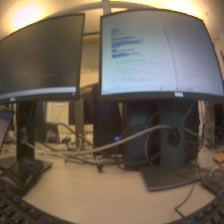

Stream stopped.


In [6]:
continuous_analysis("194.47.156.140")  # Replace with your Jetbot's actual IP
